In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
import os

In [50]:
# os.makedirs("100img", exist_ok=True)

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms


import warnings
warnings.filterwarnings('ignore')

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [53]:
import os

In [54]:
import os

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder


# extra utility
from PIL import Image
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [55]:
cords = pd.read_csv('/kaggle/input/city-street-view-dataset/picture_coords.csv',names=['Latitude','Longitude'])
cords.columns

Index(['Latitude', 'Longitude'], dtype='object')

In [56]:
cords.shape

(48953, 2)

In [57]:
labels = pd.read_csv('/kaggle/input/labels/labels.csv',names=['file_name','City'])
labels

,file_name,City
0,street_view_0.jpg,city-of-new-york
1,street_view_1.jpg,washington
2,street_view_2.jpg,detroit
3,street_view_3.jpg,san-francisco
4,street_view_4.jpg,chicago
...,...,...
48948,street_view_48948.jpg,city-of-new-york
48949,street_view_48949.jpg,city-of-new-york
48950,street_view_48950.jpg,chicago
48951,street_view_48951.jpg,city-of-new-york


In [58]:
labels.shape

(48953, 2)

In [59]:
# path data =
# /kaggle/input/city-street-view-dataset

In [60]:
file_names = [ ]

for f in os.listdir('/kaggle/input/city-street-view-dataset'):
    name, ext = os.path.splitext(f)
    if ext == '.jpg':
        sl = int(name.replace('street_view_',''))
        file_names.append((sl,f))

# correct way to sort
file_names.sort(key=lambda x: x[0])
print(*file_names[:10],sep='\n')

(0, 'street_view_0.jpg')
(1, 'street_view_1.jpg')
(2, 'street_view_2.jpg')
(3, 'street_view_3.jpg')
(4, 'street_view_4.jpg')
(5, 'street_view_5.jpg')
(6, 'street_view_6.jpg')
(7, 'street_view_7.jpg')
(8, 'street_view_8.jpg')
(9, 'street_view_9.jpg')


In [61]:
cords['file_name'] = [tup[1] for tup in file_names]
cords['City'] = labels['City']

In [62]:
# all the label are mapped accordingly
is_match  = cords['file_name'] == labels['file_name']
is_match.value_counts() == len(cords)

True    True
Name: file_name, dtype: bool

In [63]:
# df = cords.copy() # can be used to get un-processed data frame
df = cords.copy()
df

,Latitude,Longitude,file_name,City
0,40.864413,-73.893292,street_view_0.jpg,city-of-new-york
1,38.884714,-76.927431,street_view_1.jpg,washington
2,42.367025,-83.115961,street_view_2.jpg,detroit
3,37.798462,-122.423526,street_view_3.jpg,san-francisco
4,41.699542,-87.690806,street_view_4.jpg,chicago
...,...,...,...,...
48948,40.586716,-74.092753,street_view_48948.jpg,city-of-new-york
48949,40.720343,-73.945508,street_view_48949.jpg,city-of-new-york
48950,41.785543,-87.638343,street_view_48950.jpg,chicago
48951,40.610056,-73.910862,street_view_48951.jpg,city-of-new-york


In [64]:
# almost evenly distributed
df['City'].value_counts()

chicago             9971
city-of-new-york    9838
detroit             9809
washington          9706
san-francisco       9625
Name: City, dtype: int64

In [65]:
labels = list(df['City'].unique())
labels

['city-of-new-york', 'washington', 'detroit', 'san-francisco', 'chicago', nan]

In [66]:
labels = labels[:-1]
labels

['city-of-new-york', 'washington', 'detroit', 'san-francisco', 'chicago']

/kaggle/input/city-street-view-dataset/street_view_3720.jpg


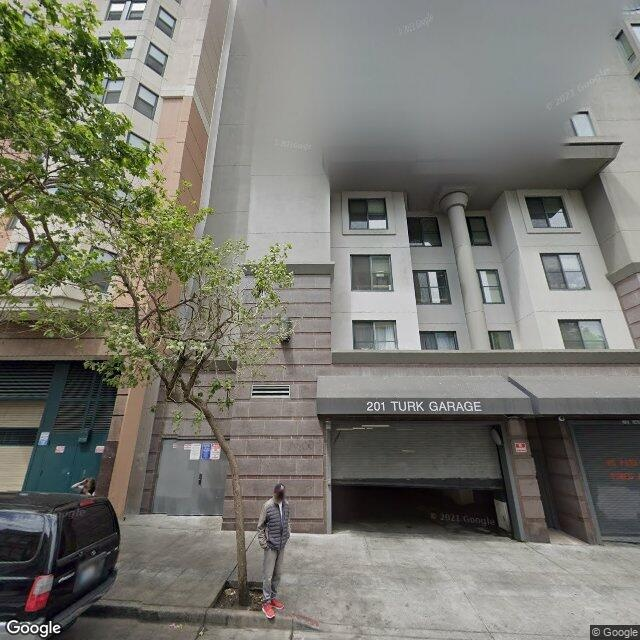

In [67]:
# gets a random image
random_df = df.sample()
row = random_df['file_name']


file = row.iloc[0]
img_path = f'/kaggle/input/city-street-view-dataset/{file}'

# output
print(img_path)
display.Image(img_path)

<hr style="height:5em;background-color:#ff4754;">

# 3- `Data Splint`

<hr style="height:1px;background-color:#ff4754;">

In [68]:
# to module to pre-pare data
import os
import shutil

In [69]:
# VARIABLES

# maximum number of image toselect from a city!
CLASS_MAX = 1000
CLASS_COUNT = {}


# where to save classes?
dest_data_dir = f"./filtered_data_{CLASS_MAX}"

# where is raw(resized,recolored) images ?
src_data_dir = "/kaggle/input/city-street-view-dataset"

In [70]:
# create a class directory for each city-name
for city_class in labels:
    # create the path
    class_dir = os.path.join(dest_data_dir,city_class)
    print(class_dir)
    
    # now create a directory for each filtered city if not exist already!
    os.makedirs(class_dir,exist_ok=True)

./filtered_data_1000/city-of-new-york
./filtered_data_1000/washington
./filtered_data_1000/detroit
./filtered_data_1000/san-francisco
./filtered_data_1000/chicago


In [71]:
for label in labels:
    CLASS_COUNT[label] = 0
print(CLASS_COUNT)

{'city-of-new-york': 0, 'washington': 0, 'detroit': 0, 'san-francisco': 0, 'chicago': 0}


In [72]:

for index, row in df.iterrows():
    # extract file name
    img_file,city_class = row['file_name'],row['City']
    
    # ** for handle where city_class is invalid **
    if type(city_class) != type(''):
        continue

    # check is required cities are copied
    if CLASS_COUNT[city_class] > CLASS_MAX:
        continue
    else:
        CLASS_COUNT[city_class] += 1
        
    # select class directory based  on city name
    # print(dest_data_dir, img_file,city_class)
    class_dir = os.path.join(dest_data_dir,city_class)
    
    # define source & destination forlders
    src_path = os.path.join(src_data_dir, img_file)
    dst_path = os.path.join(class_dir, img_file)
    
    # print('src_path: ',src_path)
    # print('dst_path: ',dst_path)
    
    # handle if src_path is invalid
    if not os.path.exists(src_path):
        print(f'{src_path} is not valid source path!')
        break
    else:
        # print(f'{src_path} is valid')
        pass

    if os.path.exists(dst_path):
        # print(f'[Ignored] - {dst_path} already exist')
        pass
    else:
        # print(f'{dst_path} does not exisat')
        shutil.copy(src_path, dst_path)
        pass
print(CLASS_COUNT)

{'city-of-new-york': 1001, 'washington': 1001, 'detroit': 1001, 'san-francisco': 1001, 'chicago': 1001}


In [73]:
import os
from sklearn.model_selection import train_test_split

In [74]:
data_dir = dest_data_dir
data_dir

'./filtered_data_1000'

In [75]:
# sub-dir for each class
city_label_dirs = sorted([os.path.join(data_dir, d) for d in os.listdir(data_dir)])
print(*city_label_dirs,sep='\n')

./filtered_data_1000/chicago
./filtered_data_1000/city-of-new-york
./filtered_data_1000/detroit
./filtered_data_1000/san-francisco
./filtered_data_1000/washington


In [76]:
# image & label in different list
images = []
city_labels = []

In [77]:
# Loop through the class directories to get the images and labels
for city_label_dir in city_label_dirs:
    class_label = os.path.basename(city_label_dir)
    for img_file in os.listdir(city_label_dir):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(city_label_dir, img_file)
            images.append(img_path)
            city_labels.append(class_label)

In [78]:
# split the data into training and testing sets

train_images, test_images, train_labels, test_labels = train_test_split(
    images, city_labels, test_size=0.2, random_state=42)

# Print the size of each set
print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")

print(*train_images[:10], sep="\n")

Number of training images: 4004
Number of testing images: 1001
./filtered_data_1000/san-francisco/street_view_2448.jpg
./filtered_data_1000/san-francisco/street_view_547.jpg
./filtered_data_1000/san-francisco/street_view_2494.jpg
./filtered_data_1000/city-of-new-york/street_view_2692.jpg
./filtered_data_1000/san-francisco/street_view_3914.jpg
./filtered_data_1000/detroit/street_view_4550.jpg
./filtered_data_1000/chicago/street_view_3542.jpg
./filtered_data_1000/san-francisco/street_view_3641.jpg
./filtered_data_1000/washington/street_view_823.jpg
./filtered_data_1000/city-of-new-york/street_view_1529.jpg


In [79]:
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [80]:
# create the directories if they do not exist for each ...
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [81]:
# **on same dick, os.rename() faster**
in_same_disk = True

# run this once only
move_now = True

if move_now:
    # move all train images
    for img_file, label in zip(train_images, train_labels):
        class_dir = os.path.join(train_dir, label)
        os.makedirs(class_dir, exist_ok=True)

        dst_path = os.path.join(class_dir, os.path.basename(img_file))

        if not in_same_disk:
            shutil.move(img_file, dst_path)
        else:
            os.rename(img_file, dst_path)

    # move all test images
    for img_file, label in zip(test_images, test_labels):
        class_dir = os.path.join(test_dir, label)
        os.makedirs(class_dir, exist_ok=True)

        dst_path = os.path.join(class_dir, os.path.basename(img_file))

        if not in_same_disk:
            shutil.move(img_file, dst_path)
        else:
            os.rename(img_file, dst_path)
else:
    print('Done Already(probably)')

In [82]:
# delete empty class  directories


# create a class directory for each city-name
for city_class in labels:

    class_dir = os.path.join(dest_data_dir,city_class)

    if os.path.exists(class_dir):
        print(f'[Deleting] - {class_dir}')
        
        # will throw error if directory is not empty!
        # in case if move_now = False, maybe images are  not cpied
        os.rmdir(class_dir,)
    else:
        print(f'[Invalid path] - {class_dir} does not exist')

[Deleting] - ./filtered_data_1000/city-of-new-york
[Deleting] - ./filtered_data_1000/washington
[Deleting] - ./filtered_data_1000/detroit
[Deleting] - ./filtered_data_1000/san-francisco
[Deleting] - ./filtered_data_1000/chicago


<hr style="height:5em;background-color:#ff4754;">

#  1 - `Training` 

<hr style="height:1px;background-color:#ff4754;">




- importing all necessary module at top 

In [111]:
# importing library

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms


import warnings
warnings.filterwarnings('ignore')

In [112]:
# define transforms to apply to the data

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [113]:
# load the train and test data

train_data = datasets.ImageFolder('filtered_data_1000/train', transform=transform)
test_data = datasets.ImageFolder('filtered_data_1000/test', transform=transform)

In [114]:
# define the model from builting models

model = models.resnet50(pretrained=False)
num_classes = len(train_data.classes)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

In [115]:
# trying with different optimizer

optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [116]:
# Knwo about the sad life :(
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [117]:
# Train the model
batch_size = 32
num_epochs = 5
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    # Train for one epoch
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_data)

    # Evaluate on the test set
    model.eval()
    running_corrects = 0
    for i, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    epoch_acc = running_corrects.double() / len(test_data)

    # Print the results for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, epoch_loss, epoch_acc*100))

Epoch [1/5], Loss: 1.6253, Accuracy: 31.97%
Epoch [2/5], Loss: 1.4025, Accuracy: 38.16%
Epoch [3/5], Loss: 1.3615, Accuracy: 42.96%
Epoch [4/5], Loss: 1.3076, Accuracy: 48.25%
Epoch [5/5], Loss: 1.2625, Accuracy: 44.46%


In [118]:
torch.save(model.state_dict(), "./model-50.pt")

<hr style="height:5em;background-color:#ff4754;">

#  2 - `Evaluation` 

<hr style="height:1px;background-color:#ff4754;">

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Define the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Get the predicted labels and true labels for the test data
y_pred = []
y_true = []
model.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred += preds.tolist()
        y_true += labels.tolist()

In [120]:
# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score:', f1)

F1 score: 0.38101422085080333


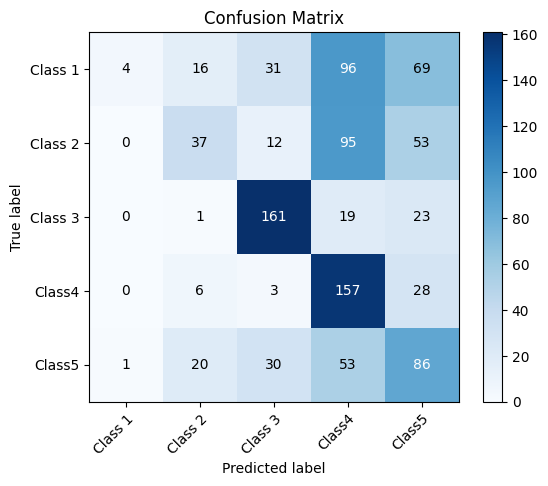

In [121]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the color map
cmap = plt.get_cmap('Blues')

# Create the figure
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=cmap)

# Add the color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Add the labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 1', 'Class 2', 'Class 3','Class4',"Class5"], 
       yticklabels=['Class 1', 'Class 2', 'Class 3',"Class4","Class5"],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')


# Rotate the xticks label
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add the numbers to the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()

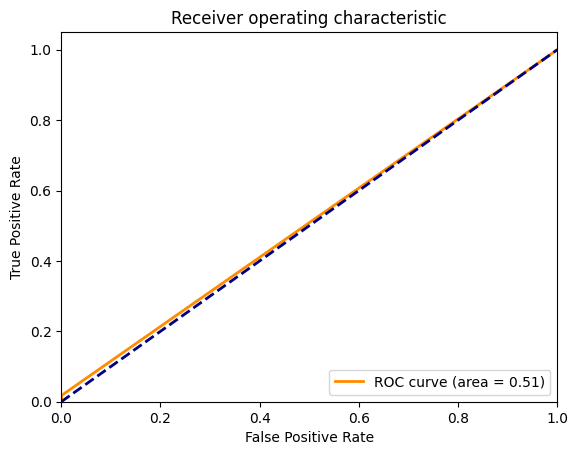

In [122]:
# ploting the ROC curve

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_true) == i, np.array(y_pred) == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

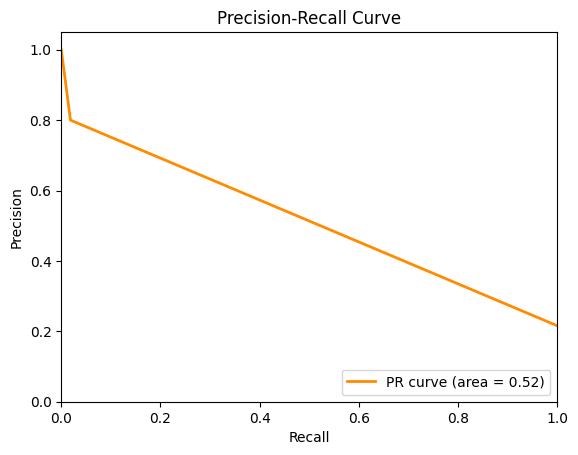

In [124]:
# ploting the precision-recall curve

precision = {}
recall = {}
pr_auc = {}
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_true) == i, np.array(y_pred) == i)
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure()
plt.plot(recall[0], precision[0], color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()